# PCA

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
https://scipy-lectures.org/packages/scikit-learn/index.html#the-eigenfaces-example-chaining-pca-and-svms
https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py

In [1]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/cosmos/scikit_learn_data


(400, 4096)

In [2]:
############################################################
# Let's visualize these faces to see what we're working with

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [3]:
# We'll perform a Support Vector classification of the images. We'll do a
# typical train-test split on the images:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=250, whiten=True)
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

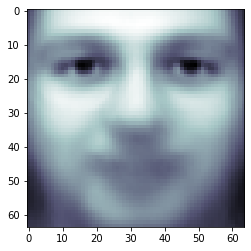

In [14]:
############################################################
# One interesting part of PCA is that it computes the "mean" face, which
# can be interesting to examine:

plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

In [15]:
############################################################
# The principal components measure deviations about this mean along
# orthogonal axes.

print(pca.components_.shape)


(250, 4096)


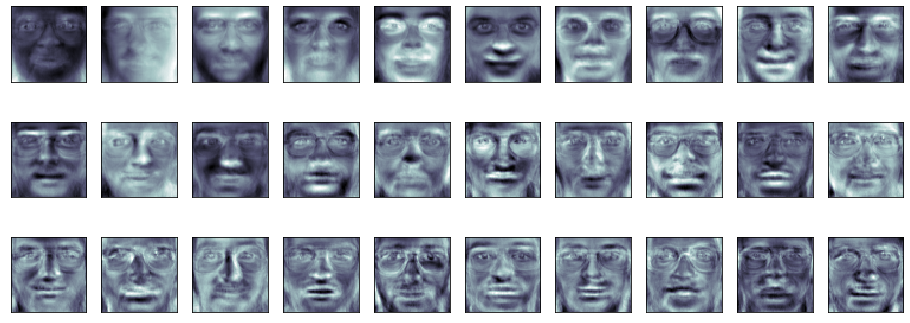

In [16]:
############################################################
# It is also interesting to visualize these principal components:

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)


In [17]:
############################################################
# The components ("eigenfaces") are ordered by their importance from
# top-left to bottom-right. We see that the first few components seem to
# primarily take care of lighting conditions; the remaining components
# pull out certain identifying features: the nose, eyes, eyebrows, etc.
#
# With this projection computed, we can now project our original training
# and test data onto the PCA basis:

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
############################################################
print(X_test_pca.shape)

(300, 250)
(100, 250)


In [18]:
############################################################
# These projected components correspond to factors in a linear combination
# of component images such that the combination approaches the original
# face.
#
# Doing the Learning: Support Vector Machines
# -------------------------------------------
#
# Now we'll perform support-vector-machine classification on this reduced
# dataset:

from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

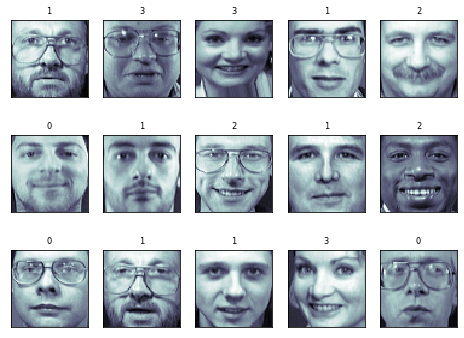

In [19]:
############################################################
# Finally, we can evaluate how well this classification did. First, we
# might plot a few of the test-cases with the labels learned from the
# training set:

import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)


In [11]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [12]:
print(metrics.confusion_matrix(y_test, y_pred))


[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
